<a href="https://colab.research.google.com/github/sweetyjunnarkar/Terrorism-around-the-Globe/blob/main/Sweety_Junnarkar_Team_5_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# **Setting Data**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
terror_df=pd.read_csv('/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/Copy of globalterrorismdb_0718dist.csv',encoding = "cp1252",low_memory=False)

In [6]:
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [8]:
terror_df=terror_df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [9]:
terror_df.head(2)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1


In [10]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  success      181691 non-null  int64  
dtypes: float64(4), int64(4),

# **Analyzing Data Globally**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


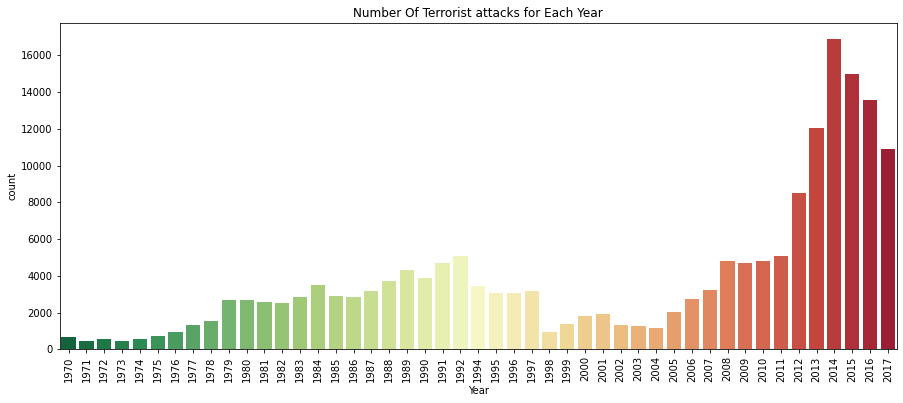

In [23]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist attacks for Each Year')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


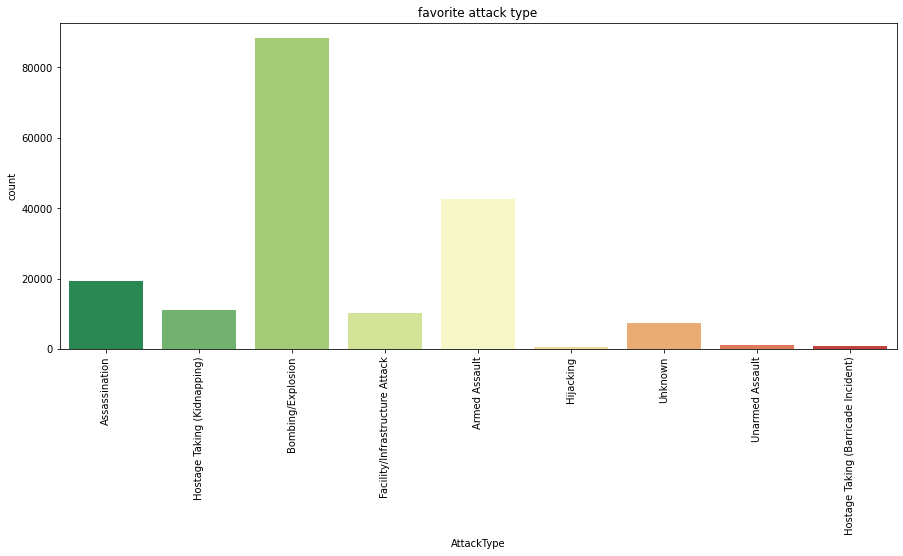

In [24]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('favorite attack type')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


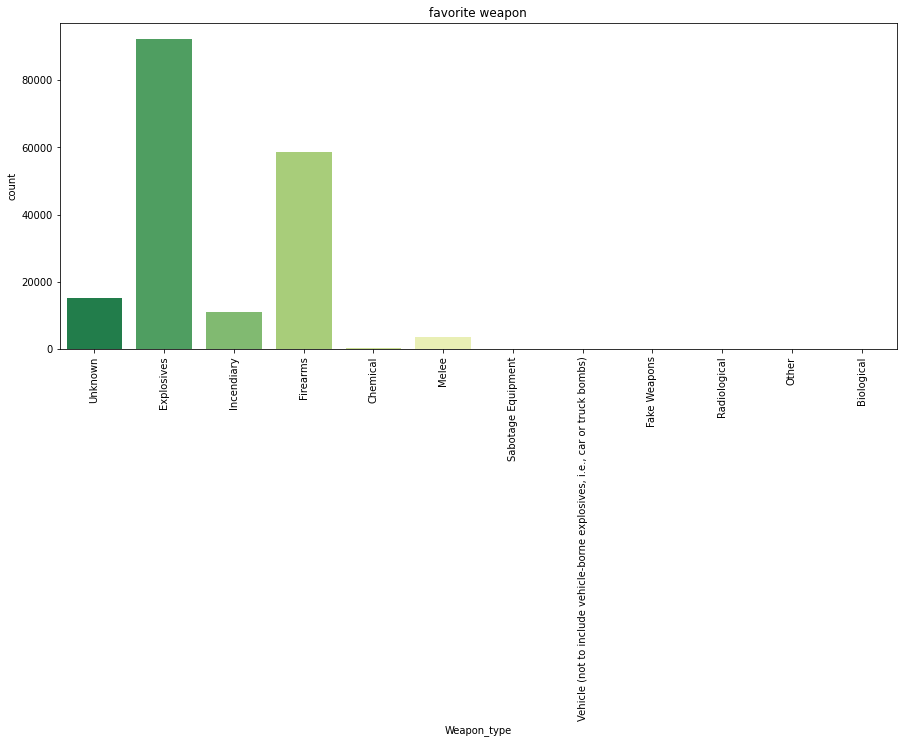

In [25]:
plt.subplots(figsize=(15,6))
sns.countplot('Weapon_type',data=terror_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('favorite weapon')
plt.show()

# **maximum attacked country-Iraq**

In [26]:
max_attack_year_df=terror_df[terror_df['Year']==2014]
max_attack_year_df

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
125335,2014,1,1,Colombia,South America,Convencion,8.868790,-73.194094,Bombing/Explosion,0.0,0.0,Crude Oil Holding Pools,01/01/2014: Assailants detonated an explosive ...,National Liberation Army of Colombia (ELN),Utilities,Explosives,"The specific motive is unknown; however, sourc...",1
125336,2014,1,1,Somalia,Sub-Saharan Africa,Mogadishu,2.059819,45.326115,Bombing/Explosion,4.0,20.0,Hotel,01/01/2014: A suicide bomber detonated an expl...,Al-Shabaab,Business,Explosives,NaN,1
125337,2014,1,1,Pakistan,South Asia,Quetta,30.200819,66.994354,Bombing/Explosion,3.0,31.0,Shia Pilgrims,01/01/2014: A suicide bomber crashed an explos...,Jaish-e-Islam,Private Citizens & Property,Explosives,Jaish-e-Islam claimed responsibility for the i...,1
125338,2014,1,1,Pakistan,South Asia,Dera Bugti,29.034412,69.158661,Bombing/Explosion,0.0,0.0,Unknown,01/01/2014: A land mine was found and defused ...,Unknown,Unknown,Explosives,NaN,0
125339,2014,1,1,Somalia,Sub-Saharan Africa,Buale,1.097128,42.598368,Hostage Taking (Kidnapping),NaN,NaN,Aid Workers,01/01/2014: Assailants abducted ten individual...,Al-Shabaab,NGO,Unknown,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142236,2014,12,31,Algeria,Middle East & North Africa,Algiers,36.763763,3.055413,Bombing/Explosion,0.0,0.0,Unknown,12/31/2014: Security forces identified and arr...,Unknown,Unknown,Explosives,NaN,0
142237,2014,12,31,Indonesia,Southeast Asia,Lembah Napu,-1.753123,120.643559,Hostage Taking (Kidnapping),1.0,0.0,Civilian,12/31/2014: Assailants abducted a local reside...,Mujahidin Indonesia Timur (MIT),Private Citizens & Property,Unknown,NaN,1
143507,2014,12,27,Afghanistan,South Asia,Saberi district,33.566561,69.878354,Bombing/Explosion,5.0,0.0,Civilians,12/27/2014: An explosive device detonated in S...,Taliban,Private Citizens & Property,Explosives,NaN,1
143727,2014,12,31,Philippines,Southeast Asia,Mlang,6.946661,124.880331,Bombing/Explosion,2.0,32.0,Market,12/31/2014: An explosive device detonated in a...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Explosives,NaN,1


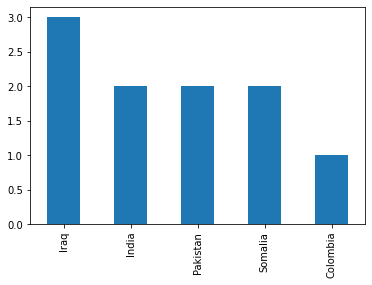

In [27]:
max_attack_year_df['Country'][0:10].value_counts().plot(kind='bar')

In [28]:
max_attacks_country=max_attack_year_df.loc[terror_df['Killed'].idxmax()].Country
max_attacks_country

'Iraq'

In [29]:
Iraq_df=max_attack_year_df[max_attack_year_df['Country']==max_attacks_country]
Iraq_df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
125340,2014,1,1,Iraq,Middle East & North Africa,Mosul,36.354145,43.143570,Bombing/Explosion,2.0,6.0,Patrol,01/01/2014: A suicide bomber detonated an expl...,Unknown,Military,Explosives,NaN,1
125341,2014,1,1,Iraq,Middle East & North Africa,Yathrib,33.994591,44.357273,Armed Assault,2.0,3.0,Checkpoint,01/01/2014: Assailants opened fire on a milita...,Unknown,Military,Firearms,NaN,1
125342,2014,1,1,Iraq,Middle East & North Africa,Tarmiyah,33.669689,44.381317,Armed Assault,4.0,12.0,Police Station,01/01/2014: Assailants stormed a police statio...,Muslim extremists,Police,Firearms,"The specific motive is unknown; however, sourc...",1
125347,2014,1,1,Iraq,Middle East & North Africa,Fallujah,33.349159,43.784199,Armed Assault,0.0,0.0,Headquarters,01/01/2014: Assailants stormed police headquar...,Islamic State of Iraq and the Levant (ISIL),Police,Firearms,"The specific motive is unknown; however, sourc...",1
125348,2014,1,1,Iraq,Middle East & North Africa,Fallujah,33.349159,43.784199,Armed Assault,1.0,0.0,Police Station,01/01/2014: Assailants stormed police station ...,Islamic State of Iraq and the Levant (ISIL),Police,Firearms,"The specific motive is unknown; however, sourc...",1


In [30]:
Iraq_df['Region'].value_counts()

Middle East & North Africa    3933
Name: Region, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


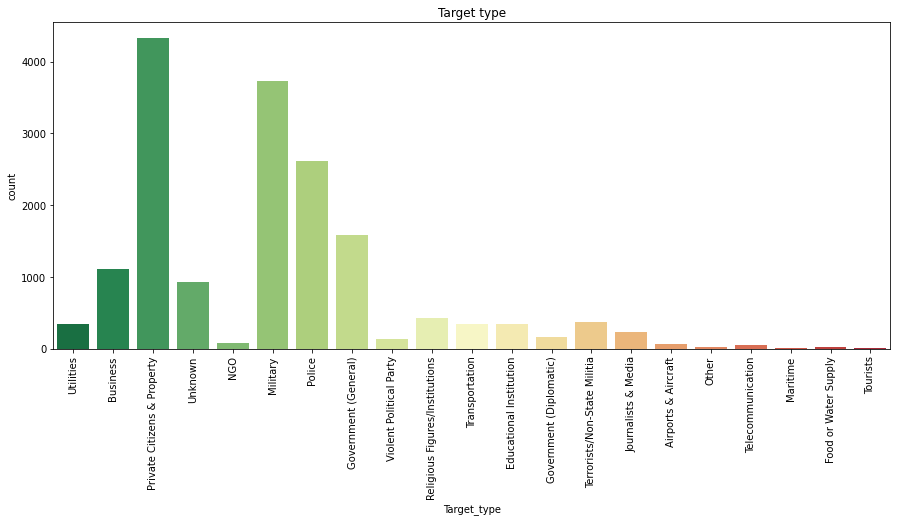

In [31]:
plt.subplots(figsize=(15,6))
sns.countplot('Target_type',data=max_attack_year_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Target type')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


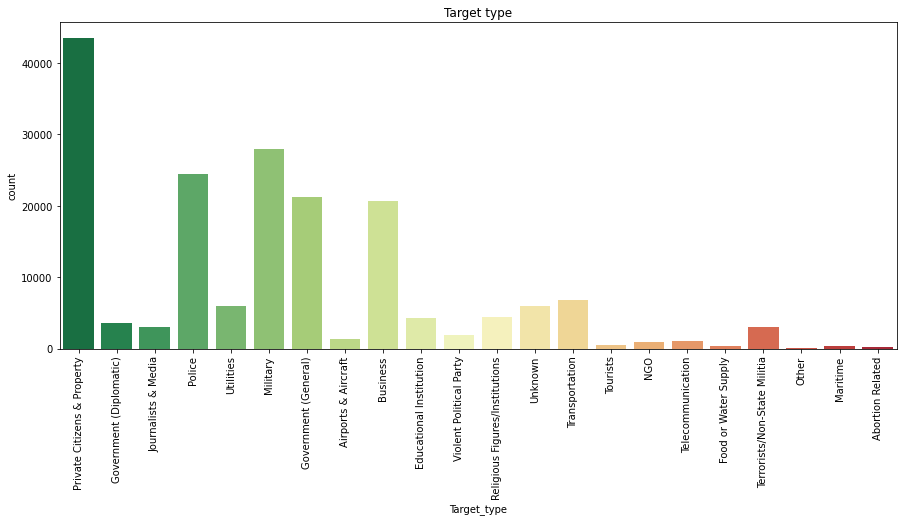

In [32]:
plt.subplots(figsize=(15,6))
sns.countplot('Target_type',data=terror_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Target type')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


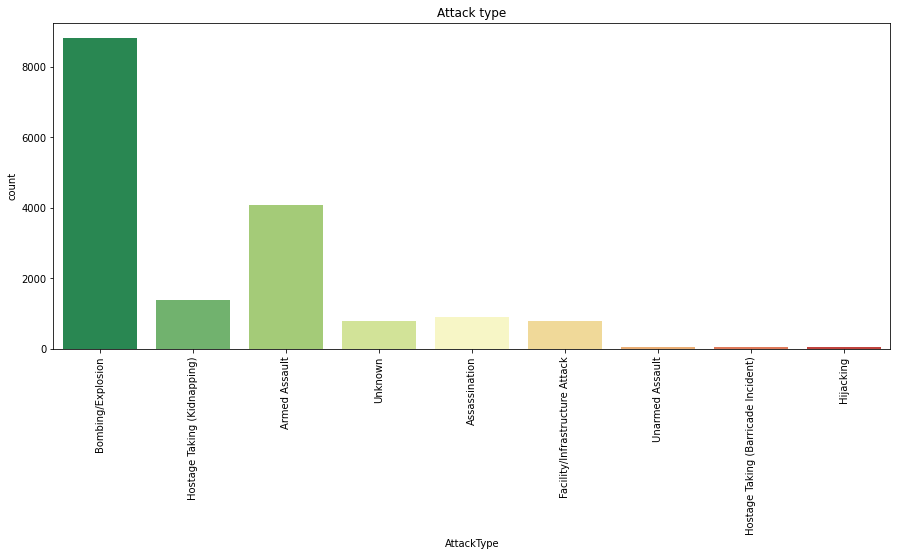

In [33]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=max_attack_year_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Attack type')
plt.show()